# Decision Tree Classifier

Dataset : Wine Data Set
Source : Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Each row of the dataset is a single game with the following features (in the order in the vector):

    1) Alcohol 
    2) Malic acid 
    3) Ash 
    4) Alcalinity of ash 
    5) Magnesium 
    6) Total phenols 
    7) Flavanoids 
    8) Nonflavanoid phenols 
    9) Proanthocyanins 
    10)Color intensity 
    11)Hue 
    12)OD280/OD315 of diluted wines 
    13)Proline 

In [163]:
# Binary Tree Search

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#pd.set_option('expand_frame_repr', 'default')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
names = ['wine','alcohol', 'malic-acid', 'ash', 'alca-ash', 'mg', 'tot-phenols', 'flavanoids', 'non-flava-phenols', 'proanthocyanins', 'col-intensity', 'hue', 'od-280-315', 'proline']
wine_df = pd.read_csv(url, names=names)

wine_df.describe()


,wine,alcohol,malic-acid,ash,alca-ash,mg,tot-phenols,flavanoids,non-flava-phenols,proanthocyanins,col-intensity,hue,od-280-315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [96]:
wine_df.head(10)

,wine,alcohol,malic-acid,ash,alca-ash,mg,tot-phenols,flavanoids,non-flava-phenols,proanthocyanins,col-intensity,hue,od-280-315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [97]:
# Preprocessing

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(wine_df.iloc[:, 1:], wine_df.iloc[:, 0], test_size=0.20, random_state=42)
print('preprocessing DONE : Train Set (80%), Test Set(20%)')


preprocessing DONE : Train Set (80%), Test Set(20%)


In [135]:
# Train data
# criterion = 'gini'
clf = tree.DecisionTreeClassifier()
clf.fit(X_wine_train, y_wine_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
# Train data
# criterion = 'entropy'
clf2 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf2.fit(X_wine_train, y_wine_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

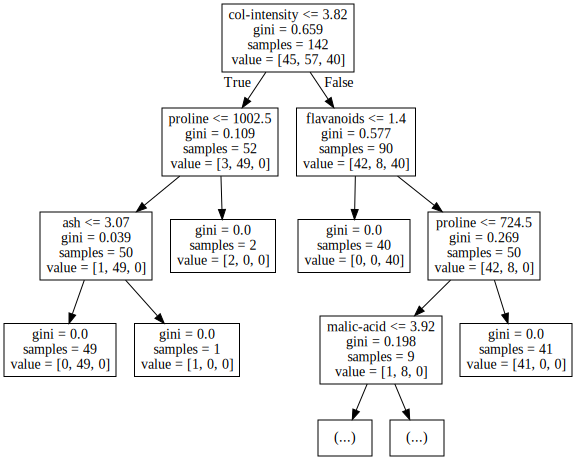

In [175]:
feature = ['alcohol', 'malic-acid', 'ash', 'alca-ash', 'mg', 'tot-phenols', 'flavanoids', 'non-flava-phenols', 'proanthocyanins', 'col-intensity', 'hue', 'od-280-315', 'proline']

dot_data = tree.export_graphviz(clf,out_file=None, feature_names=feature, max_depth=3) 
graph = graphviz.Source(dot_data)

graph

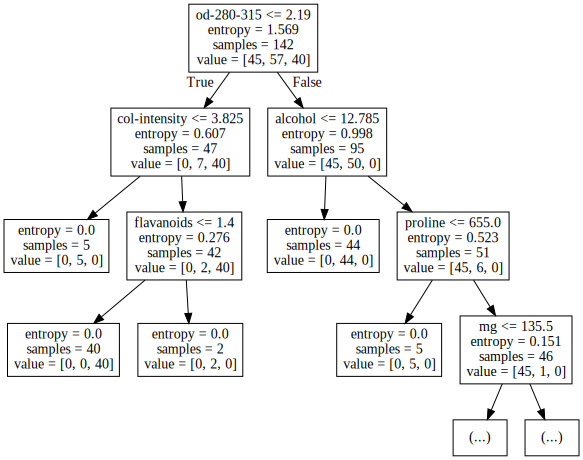

In [176]:
feature = ['alcohol', 'malic-acid', 'ash', 'alca-ash', 'mg', 'tot-phenols', 'flavanoids', 'non-flava-phenols', 'proanthocyanins', 'col-intensity', 'hue', 'od-280-315', 'proline']

dot_data2 = tree.export_graphviz(clf2,out_file=None, feature_names=feature, max_depth=3) 
graph = graphviz.Source(dot_data2)

graph

The visualization of decision tree



In [144]:
y_pred = clf.predict(X_wine_test)

In [142]:
clf.predict_proba(X_wine_test)

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [1]:
# Accuracy for gini index



print('Accuracy score :')
print(accuracy_score(y_wine_test, y_pred))
print('Normalized Accuracy Score :')
print(accuracy_score(y_wine_test, y_pred, normalize=False))
print('AUC')
fpr, tpr, thresholds = metrics.roc_curve(y_wine_test, y_pred, pos_label=2)
print(metrics.auc(fpr, tpr))

Accuracy score :


NameError: name 'accuracy_score' is not defined

In [172]:
y_pred2 = clf2.predict(X_wine_test)

# Accuracy for entropy

print('Accuracy score :')
print(accuracy_score(y_wine_test, y_pred2))
print('Normalized Accuracy Score :')
print(accuracy_score(y_wine_test, y_pred2, normalize=False))
print('AUC')
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_wine_test, y_pred2, pos_label=2)
print(metrics.auc(fpr2, tpr2))

Accuracy score :
0.916666666667
Normalized Accuracy Score :
33
AUC
0.727272727273


# Feedback

- Using both criterion = {gini, entropy} 
    - While using entropy, the root gives the value more that 1. How this is possible?
- fit the models as default without giving the max_depth. Thus, the overfit of this model could occur.
- Refer to the first hypothesis using the gini impurity, the highest gini value is by the color intensity.
- Refer to the second hypothesis using the entropy, the highest entropy value is by the OD280/OD315.
- Since the class K = {1,2,3} the value in each node represent the sample which response to the label. 
- Both the decision tree (entropy, gini index) have 4 levels until theirs last leaf nodes.


# Model Test

In here, I am trying to evaluate the wine data sets with some of the classification algorithm

1. Logistic Regression
2. Linear Discriminant Analysis
3. KNN
4. Decision Tree Classifier
5. Gaussian NB
6. SVC

The code below belongs to this site: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [161]:
seed = 7
scoring = 'accuracy'

In [166]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_wine_train, y_wine_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.950000 (0.045737)
LDA: 0.964286 (0.035714)
KNN: 0.654762 (0.067554)
CART: 0.900476 (0.085885)
NB: 0.964286 (0.065854)
SVM: 0.415714 (0.140586)


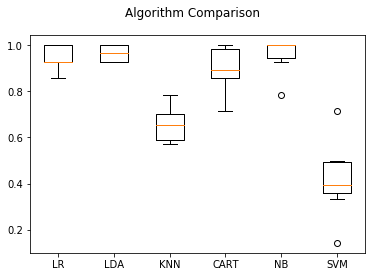

In [167]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [169]:
# Make predictions on validation dataset KNN

knn = KNeighborsClassifier()
knn.fit(X_wine_train, y_wine_train)
predictions = knn.predict(X_wine_test)
print('Accuracy Score :')
print(accuracy_score(y_wine_test, predictions))
print('Confusion Matrix :')
print(confusion_matrix(y_wine_test, predictions))
print('Classification report :')
print(classification_report(y_wine_test, predictions))


Accuracy Score :
0.722222222222
Confusion Matrix :
[[12  0  2]
 [ 0 11  3]
 [ 2  3  3]]
Classification report :
             precision    recall  f1-score   support

          1       0.86      0.86      0.86        14
          2       0.79      0.79      0.79        14
          3       0.38      0.38      0.38         8

avg / total       0.72      0.72      0.72        36

